# Motivation
* Das Ziel der Z-Transformation ist es, ein diskretes zeitabhängiges Signal $x[k]$ in den Bildbereich bzw. Z-Bereich zu Transformieren. $x[k]$ ist hierbei eine Folge aus reellen oder komplexen Zahlen

* Diese Transformation in den Z-Bereich wird zum Lösen von linearen Differenzengleichungen mit konstanten Koeffizienten verwendet. Diese Gleichungen haben die Form $y[k] = b_0 x[k] + \sum_{i=1}^V b_i \cdot x[k-i] - \sum_{i=1}^U a_i \cdot y[k-i]$

* Die Differenzengleichungen im Zeitbereich werden im Bildbereich zu algebraischen Gleichungen. Damit werden Polynome und rationale Funktionen in der Systemtheorie eingeführt.

* Systeme welche mit dieser Gleichung beschrieben werden können sind linear und Zeitinvariant. Diese LTI-Systeme treten in der Praxis sehr häufig aus und besitzen eindeutige mathematische Beschreibungen.

* Die Z-Transformation lässt sich entweder als einseitige oder als beidseitige Transformation druchführen
    * Die einseitige Z-Transformation wird für kausale Signale verwendet (In der Praxis treten diese sehr häufig auf)
    
    * Die beidseitige Z-Transformation kann auch für nicht kausale Signale verwendet werden    


![Beschreibung](Beschreibung.svg)

# Grundlagen
## Definitionsgleichung
- Die Z-Transformation ist die Laplace-Transformation für diskrete Systeme.

- Diese Herleitung bezieht sich auf die einseitige Z-Transformation für ein kausales System.

- Ein allgemeines Diskretes Signal kann z.B. über eine Ideale Abtastung (Abtastung an jedem Wert $t \in\mathrm{N}$) eines kontinuierlichen Signales daargestellt werden
$$x_A(t)=\sum_{k=-\infty}^\infty x( k \cdot T_A ) \cdot \delta ( t - k \cdot T_A )\label{eq:xAti}$$

- Da es sich um ein Kausales Signal handelt wird die untere Summationsgrenze $k = 0$ gilt
$$x_A(t)=\sum_{k=0}^\infty x( k \cdot T_A ) \cdot \delta ( t - k \cdot T_A )\label{eq:xAtn}$$

- Führt man eine Laplacetransformation an diesem kontinuierlichen kausalen Signal durch erhält man
$$X_A(s) = \mathcal{L}\{\sum_{k=0}^\infty x( k \cdot T_A ) \cdot \delta ( t - k \cdot T_A )\}\label{eq:xAs}$$

- Durch einige Lineare Umformungen erhält man dann die Gleichung
$$X_A(s) = \mathcal{L}\{\sum_{k=0}^\infty x( k \cdot T_A ) \cdot \delta ( t - k \cdot T_A )\} = \sum_{k=0}^\infty x[k] \cdot (e^{T_A \cdot s})^{-k}\label{eq:LxAk}$$

- Die Variable s ist eine Komplexe zahl, substituiert man diese mit $z = e^{T_A \cdot s}\label{eq:Zsubs}$
erhält man die Gleichung der Z-Transformation
$$X(z) = \sum_{k=0}^\infty x[k] \cdot z^{-k}\textrm{  (1.1)}$$

- Die Z-Transformation kann auch mit der Schreibweise $\mathcal{Z}\{[x[k]\} = X(z)$ vereinfacht daargestellt werden

- $X(z)$ representiert den Z-Bereich und $x[k]$ den Zeitbereich

- Für die inverse Z-Transformation wird die Schreibweise ${\mathcal{Z}}^{-1}\{[x[k]\}$ verwendet

### Daarstellung der Abtastung

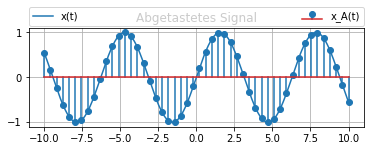

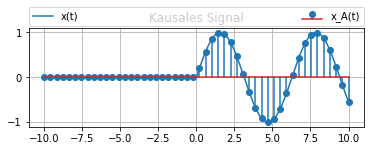

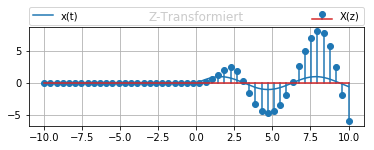

In [19]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
time = 10000
T_A = 200
t = np.linspace(-10,10,time)
k = np.linspace(-10,10,time//T_A)

x = np.sin(t)
x_A = np.sin(k)

plt.subplot(211)
plt.title("Abgetastetes Signal")
plt.plot(t,x, label = "x(t)")
plt.stem(k,x_A, label = "x_A(t)")
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# Kausal
x = [0 if(t < time//2) else x[t] for t in range(time)]
x_A = [0 if(t < time//T_A//2) else x_A[t] for t in range(time//T_A)]  

plt.subplot(211)
plt.title("Kausales Signal")
plt.plot(t,x, label = "x(t)")
plt.stem(k,x_A, label = "x_A(t)")
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# Z-Transformiert
z = k
X_z = (z * np.sin(k)) / (z** - 2*z*np.cos(k) + 1) # über transformationstabelle für sin(k)
X_z = [0 if(t < time//T_A//2) else X_z[t] for t in range(time//T_A)]  

plt.subplot(211)
plt.title("Z-Transformiert")
plt.plot(t,x, label = "x(t)")
plt.stem(z,X_z, label = "X(z)")
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.show()

Funktionen zum daarstellen von Z-Funktionen

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import mpmath
import warnings
warnings.filterwarnings("ignore")
mpmath.dps = 5   
def zplane(b,a,filename=None):
    """
        :desc:  Plot des komplexen z-bereiches
        :param: b = die koeffizienten b_i der Funktion X(z) -> Zähler
        :param: a = die Koeffizienten a_i der Funktion X(z) -> Nenner
    
    """
    ax = plt.subplot(111)
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

    return z, p, k

def plot_z_3d(p1, p2, z1, z2):
    """
        :desc:  Plot einer funktion X(z) für polynome 2.grades
        :param: p1, p2 -> komplexe Polstellen
        :param: z1, z2 -> komplexe Nullstellen
    
    """
    # Calculate a and b coefficients from poles and zeros
    a = np.convolve([1,-p1],[1,-p2])
    b = np.convolve([1,-z1],[1,-z2])
    f = lambda z: (b[0]*z*z + b[1]*z + b[2])/(a[0]*z*z + a[1]*z + a[2])

    fig = pylab.figure()
    ax = Axes3D(fig)
    X = np.arange(-1, 2, 0.125)
    Y = np.arange(-1, 2, 0.125)
    X, Y = np.meshgrid(X, Y)
    xn, yn = X.shape
    W = X*0
    for xk in range(xn):
        for yk in range(yn):
            try:
                z = complex(X[xk,yk],Y[xk,yk])
                w = float(f(z))
                if w != w:
                    raise ValueError
                W[xk,yk] = w
            except (ValueError, TypeError, ZeroDivisionError):
                # can handle special values here
                pass

    ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
    #ax.plot_wireframe(X, Y, W, rstride=1, cstride=1)
    #ax.scatter(X, Y, W)
    plt.title("Z-Transformierte einer Übertragungsfunktion")
    plt.show()

## Konkrete transformation grundlegender Signale
Die Transformationen der Signale werden über die Definitionsgleichung 1.1 der Z-Transformation berechnet   
 

### Der Einheitsimpuls $\delta[k]$
 - Der Einheitsimpuls ist definiert durch  
$$
\displaystyle x[k] = \delta[k] = \begin{cases}
 1 & \text{wenn $k = 0$} \\ 
 0 & \text{sonst} 
 \end{cases}
$$ 

 - Durch einsetzen in die Definitionsgleichung erhält man 
 $$X(z) = \sum_{k=0}^\infty \delta[k] \cdot z^{-k}$$      

 - Wegen der Ausblendungseigenschaft des Einheitsimpulses gilt 
 $$X(z) = 1 \cdot z^0 = 1$$  

 - Ist der Impuls im Zeitbereich um $k_0$ verschoben erhält man 
 $$X(z) = \sum_{k=0}^\infty \delta[k-k_0] \cdot z^{-k}$$

 - Wegen der Ausblendungseigenschaft des Einheitsimpulses gilt 
 $$X(z) = 1 \cdot z^{-k_0} = z^{-k_0}\textrm{  (1.2)}$$

### Die Sprungfunktion $x[k] = \sigma[k]$

 - Die Sprungfunktion ist definiert durch 
$$
\displaystyle x[k] = \sigma[k] = \begin{cases}
 1 & \text{wenn $k \geq 0$} \\ 
 0 & \text{sonst} \\ 
 \end{cases}
$$

 - Durch einsetzen in die Definitionsgleichung erhält man 
 $$X(z) = \sum_{k=0}^\infty \sigma[k] \cdot z^{-k}\textrm{  (1.3.1)}$$ 

 - Da alle $x[k] = 1$ für $k \geq 0$, lässt sich 1.3.1 umformen zu 
 $$X(z) = \sum_{k=0}^\infty 1 \cdot z^{-k} = \sum_{k=0}^\infty (\frac{1}{z})^k \textrm{  (1.3.2)}$$

 - Die Gleichung 1.3.2 ist eine unendlich geometrische Reihe. Für diese gilt 
 $$\sum_{k=0}^\infty q^k = \frac{1}{1-q} \textrm{  (1.3.3)}$$

 - Mit der Gleichung 1.3.3 ergibt sich für die Gleichung 1.3.2
$$\sum_{k=0}^\infty (\frac{1}{z})^k = \frac{1}{1-\frac{1}{z}} \textrm{  (1.3)}$$

### Das Rechtecksignal $x[k] = \sigma[k] - \sigma[k-K]$
 - Das Rechtecksignal ist definiert durch  
$$
\displaystyle x[k] = \sigma[k] - \sigma[k-K] = \begin{cases}
 0 & \text{wenn $k \lt 0$} \\
 1 & \text{wenn $0 \lt k \lt K$} \\ 
 0 & \text{wenn $k \gt K$}
\end{cases}
$$    

 - Durch Einsetzen in die Definitionsgleichung erhält man 
 $$X(z) = \sum_{k=0}^\infty (\sigma[k] - \sigma[k-K]) \cdot z^{-k}$$

 - Wegen der Definition des Rechtecksignals gilt 
 $$X(z) = \sum_{k=0}^K (\sigma[k] - \sigma[k-K]) \cdot z^{-k}$$

 - Da alle $x[k] = 1$ für $0 <= k <= K$, lässt sich die Gleichung umformen 
 $$X(z) = \sum_{k=0}^K 1 \cdot z^{-k} = \sum_{k=0}^K z^{-k} = \sum_{k=0}^K \frac{1}{z^{-k}}\textrm{  (1.4.1)}$$

 - Diese Summe in 1.4.1 ist eine endliche geometrische Reihe, für diese gilt 
 $$\sum_{k=0}^{K-1} q^k = \frac{1-q^K}{1-q}\textrm{  (1.4.2)}$$

 -  Mit der Gleichung 1.4.2 ergibt sich für die Gleichung 1.4.1 
 $$\sum_{k=0}^K \frac{1}{z^{-k}} = \sum_{k=0}^{K-1} = \frac{1-z^{-K}}{1-z^{-1}}$$

 - Damit ergibt sich 
 $$X(z) = \sum_{k=0}^\infty (\sigma[k] - \sigma[k-K]) \cdot z^{-k} = \frac{1-z^{-K}}{1-z^{-1}} \textrm{  (1.4)}$$

### Beispiel

- gegeben sei die Impulsantwort eines Systems $h[k] = \delta[k] + 2 \cdot \delta[k-1] + \delta[k-2]$ 

- Das Signal $h[k]$ kann tabellarisch daargestellt werden

n        | -1 | 0 | 1 | 2 | 3
---------|----|---|---|---|---
$x[n]$   | 0  | 1 | 1 | 1 | 0

- Mit den Gleichungen 1.7 und 1.9 kann dann die Z-Transformierte bestimmt werden

- $H(z) = \sum_{n=-1}^{3} h[n] * z^{-n} = z^0 + 2 \cdot z^{-1} + z^{-2} = 1 + \frac{2}{z} + \frac{1}{z^2} = \frac{z^2 + 2z + 1}{z^2}$

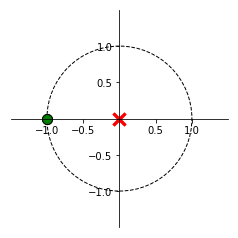

Nullstellen: [-1. -1.]
Polstellen: [0. 0.]


In [21]:
%matplotlib inline
b = np.array([1, 2, 1])
a = np.array([1, 0, 0])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

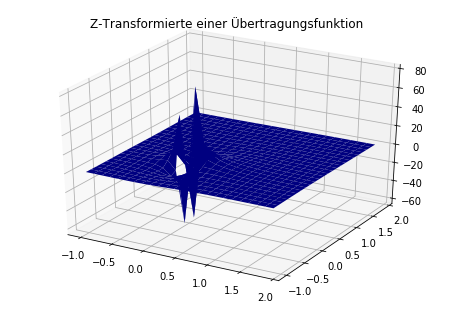

In [22]:
%matplotlib inline
#%matplotlib notebook
p1 = complex(0.0,0.0)
p2 = complex(0.0,0.0)
z1 = complex(-1.0, 0.0)
z2 = complex(-1.0, 0.0)
plot_z_3d(p1, p2, z1, z2)


- Die Z-Transformation im 3d-plot

## Existenz der Z-Transformierten
- Da bei der Z-Transformation unendliche Reihen ausgewertet werden, muss sichergestellt werden, dass $X(z) = \sum_{k=-\infty}^\infty x[k] \cdot z^{-k} \lt \infty$. Trifft dies zu konvergiert die Folge

- Ist die Konvergenz nachgewießen steht fest, dass die Z-Transformierte existiert.

- Divergiert die unendliche Reihe ist das Signal nicht Z-transformierbar

### Einseitige Z-Transformation
- Bei der einseitigen Z-Transformation wird gibt es nur einen kausalen Signalanteil damit wird die Bedingung zu $X(z) = \sum_{k=0}^\infty x[k] \cdot z^{-k} < \infty$ abgeschwächt. 

- Für den Nachweis kann das Majorantenkriterium verwendet werden.

- Sei $\sum_{k=1}^\infty a_k$ eine Reihe. Wenn es eine konvergente Reihe $\sum_{k=1}^\infty c_k$ mit $\big|a_k\big| \leqslant c_k$ für alle $k \in \mathrm{N}$ gibt, dann konvergiert $\sum_{k=1}^\infty a_k$ absolut.

- Wählt man als Folge $a_k = k[n]$ und $c_k = M \cdot r^k$, wobei $M \cdot r^k$ eine Exponentialfolge ist mit $r, M \in \mathrm{R}$ und $r \geq 0$, gilt $\big|k[n]\big| \leqslant M \cdot r^k$

- Dies führt eingesetzt in die Gleichung 1.1 zu 
$$X(z) = \sum_{k=0}^\infty x[k] \cdot z^{-k} \leqslant \big| \sum_{k=0}^\infty x[k] \cdot z^{-k} \big| \leqslant \sum_{k=0}^\infty M \cdot r^k \cdot \big| z^{-k} \big| = M \sum_{k=0}^\infty r^k \cdot \big| z^{-k} \big| =  M \sum_{k=0}^\infty \frac {r^k}  {|z^{k}|} = M \sum_{k=0}^\infty (\frac {r}  {|z|})^k$$

- und da $r \geq 0$ gilt 
$$M \sum_{k=0}^\infty (\frac {r}  {|z|})^k = M \sum_{k=0}^\infty \big|\frac {r}  {z}\big|^k$$

- Das bedeuted die Z-Transformierte existiert $\iff$ $M \sum_{k=0}^\infty \big|\frac {r}  {z}\big|^k$ konvergiert.

- Die Konvergenz für $M \sum_{k=0}^\infty \big|\frac {r}  {z}\big|^k$ ist gegeben wenn $\big| \frac{r}{z} \big| \leq 1$ oder anders formuliert $| z | \geq r$.



- Der Bereich in dem die Folge konvergiert wird Konvergenzbereich $\mathcal{K}$ genannt, wobei in diesem Fall $\mathcal{K} \in [r,\infty]$

### Zweiseitige Z-Transformation
- In der Zweiseitigen Z-Transformation existiert die Z-Transformierte $\iff \sum_{k=-\infty}^\infty \big|x[k]\cdot z^{-k}\big| \lt \infty$ .

- Die Summe lässt sich aufteilen in einen kausalen $\sum_{k=0}^\infty x[k]\cdot z^{-k}$ und einen antikausalen $\sum_{k=1}^\infty x[-k]\cdot z^{k}$ Signalanteil 
$$X(z) = \sum_{k=0}^\infty x[k]\cdot z^{-k} +  \sum_{k=1}^\infty x[-k]\cdot z^{k} $$

- Womit sich dann ein Konvergenzbereich $\mathcal{K}$ von $0 \lt a \lt |z| \lt b$. Dabei ist $a$ der Konvergenzradius des kausalen Anteils und $b$ der Konvergenzradius des antikausalen Anteils

![Konvergenzbereich](Konvergenzbereich.svg)

- Allgemein lässt sich sagen, dass die Z-Transformierte von zeitbegrenzten Signalen keine Konvergenzprobleme aufweisst.

# Rechenregeln
## Linearität
- Die Z-Transformation ist genau wie die Fourier-Transformation und die Laplace-Transformation eine lineare Transformation

- $x_1[k]$ und $x_2[k]$ seien zwei diskrete Folgen. Durch Einsetzen in die Definitionsgleichung erhält man 

$$\mathcal{Z}\{\alpha_1 \cdot x_1[k] + \alpha_2 \cdot x_2[k]\} =  \sum_{k=0}^\infty (\alpha_1 \cdot x_1[k] + \alpha_2 \cdot x_2[k]) \cdot z^{-k}$$

- Die Summe kann aufgeteilt werden in 
$$\sum_{k=0}^\infty \alpha_1 \cdot x_1[k] \cdot z^{-k} + \sum_{k=0}^\infty \alpha_2 \cdot x_2[k] \cdot z^{-k}$$

- Die Konstanten Faktoren $\alpha_1$ und $\alpha_2$ können aus der Summe gezogen werden 
$$\alpha_1 \sum_{k=0}^\infty \cdot x_1[k] \cdot z^{-k} + \alpha_2 \sum_{k=0}^\infty \cdot x_2[k] \cdot z^{-k}$$

- Die einzelnen Summen können dann durch Gleichung 1.1 ersetzt werden
$$\alpha_1 \cdot X_1(z) + \alpha_2 \cdot X_2(z)$$

- Damit gilt 
$$\mathcal{Z}\{\alpha_1 \cdot x_1[k] + \alpha_2 \cdot x_2[k]\} = \alpha_1 \cdot X_1(z) + \alpha_2 \cdot X_2(z)\textrm{  (2.1)}$$

## Zeitinvarianz / Verschiebungssatz
- Es sei $x[k]$ eine kausale und diskrete Folge

- Bei der verschiebung im Zeitbereich ändert sich bei einer zweiseitigen Z-Transformation der Konvergenzbereich $\mathcal{K}$ nicht. Bei einer einseitigen Z-Transformation werden Glieder aus dem nicht kausalen Bereich eingeschoben, bzw. aus dem kausalen Bereich rausgeschoben. Damit ändert sich auch deren Konvergenzbereich $\mathcal{K}$

### Rechtsverschiebung

- Durch Einsetzen in die Definitionsgleichung erhält man 
$$\mathcal{Z}\{x[k-k_0]\} = \sum_{k=0}^\infty x[k-k_0] \cdot z^{-k}$$

- Da das Signal Kausal ist, gilt für $k \lt k_0$ $x[k-k_0] = 0$. Damit lässt sich die untere Summationsgrenze mit $k=k_0$ ersetzen 
$$\sum_{k=k_0}^\infty x[k-k_0] \cdot z^{-k} = \sum_{k=0}^\infty x[k] \cdot z^{-(k+k_0)}$$

- Damit lässt sich $z^{-(k+k_0)}$ in eine Konstante und eine variable aufspalten 
$$\sum_{k=0}^\infty x[k] \cdot z^{-k} \cdot z^{-k_0}$$

- Die Konsante kann dann mit den Summenregeln vor die Summe gezogen werden 
$$z^{-k_0} \cdot \sum_{k=0}^\infty x[k] \cdot z^{-k}$$

- Dadurch kann die Summe durch die Gleichung 1.1 ersetzt werden $z^{-k_0} \cdot X(z)$

- Damit gilt 
$$\mathcal{Z}\{x[k-k_0]\} = z^{-k_0} \cdot X(z)\textrm{  (2.2)}$$

#### Beispiel
* Die Impulsfunktion $x[k] = \sigma [k]$ sei gegeben.

 $$X(z) = z^{-k_0} = z^{-0}= 1$$

* Gesucht sei die verschobene Impulsfunktion $ v[k-2] = \sigma [k-2] $

* Über die Rechtsverschiebung ergibt sich die Z-Transformierte $V(z) = z^{-2} \cdot 1 = z^{-2}$

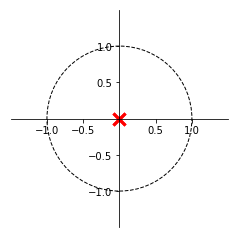

Nullstellen: []
Polstellen: [0. 0.]


In [23]:
%matplotlib inline
b = np.array([0, 0, 1])
a = np.array([1, 0, 0])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

### Linksverschiebung

- Die linksverschiebung lässt sich ähnlich wie die Rechtsverschiebung herleiten

- Damit gilt 
$$\mathcal{Z}\{x[k+k_0]\} = z^{k_0} \cdot X(z) - z^{k_0} \cdot \sum_{k=0}^{K_0-1}x[k] \cdot z^{-k} = z^{k_0} \cdot (X(z) - \sum_{k=0}^{K_0-1}x[k] \cdot z^{-k})\textrm{  (2.3)}$$

## Differenz (Ableitung im Zeitbereich)
- Die erste Differenz eines Signals ist gegeben mit $x[k] - x[k-1]$.

- Eingesetzt in die Transformationsgleichung $\mathcal{Z}\{x[k] - x[k-1]\}$ lässt sich die Differenz direkt durch den Linearitätssatz und den Verschiebungssatz herleiten. 

- Mit dem Linearitätssatz ergibt sich 
$$\mathcal{Z}\{x[k] - x[k-1]\} = \mathcal{Z}\{x[k]\} - \mathcal{Z}\{x[k-1]\}$$

- Mit dem Verschiebungssatz ergibt sich 
$$\mathcal{Z}\{x[k]\} - \mathcal{Z}\{x[k-1]\} = z^0 \cdot X(z) - z^{-1} \cdot X(z) = (1-z^{-1}) \cdot X(z) = \frac{z-1}{z} \cdot X(z)$$

- Damit gilt 
$$\mathcal{Z}\{x[k] - x[k-1]\} = \frac{z-1}{z} \cdot X(z)\textrm{  (2.4)}$$

- Bei der diskreten Ableitung bleibt der Konvergenzbereich $\mathcal{K}$ unverändert.

## Summation (Integration)
- Die Summation über einen gewissen Bereich einer Folge $x[k]$ wird beschrieben durch $x[k] = \sum_{i=0}^k x[i] - \sum_{i=0}^{k-1} x[i]$


- Eingesetzt in die Transformationsgleichung $\mathcal{Z}\{x[k]\} = \mathcal{Z} \{\sum_{i=0}^k x[i] - \sum_{i=0}^{k-1} x[i]\}$ lässt sich die Summation mit dem Differenzsatz 2.4 herleiten

- Mit dem Differenzsatz ergibt sich 
$$X(z) = \mathcal{Z} \{\sum_{i=0}^k x[i] - \sum_{i=0}^{k-1} x[i]\} = \frac{z-1}{z} \cdot \mathcal{Z}\big( \sum_{i=0}^k x[i] \big)$$

- Damit gilt 
$$\mathcal{Z}\big( \sum_{i=0}^k x[i] \big) = \frac{z-1}{z} \cdot X(z)\textrm{  (2.5)}$$

- Bei der diskreten Integration ergibt sich der neue Konvergenzbereich aus einer Teilmenge des alten Konvergenzbereichs und demm Bereich ${|z| \gt 1}$. 
$$\mathcal{K} \supseteq \mathcal{K}_x \cap {|z| \gt 1}$$

## Faltung
- Die Faltung zweier diskreter Signale ist definiert durch $y = x_1 * x_2 = \sum_{k=-\infty}^\infty x_1[k] \cdot x_2[n-k]$

- Da die Z-Transformation für Kausale Systeme betrachtet wird gilt $x[k] = 0$ für $k \lt 0$

- Damit ergibt sich für die Z-Transformation 
$$\mathcal{Z} \{x_1[k] * x_2[k]\} = \mathcal{Z} \{\sum_{k=0}^\infty x_1[k] \cdot x_2[n-k]\}$$

- Eingesetzt in die Definitionsgleichung 1.1 ergibt sich 
$$\sum_{k=0}^\infty \sum_{i=0}^\infty x_1[i] \cdot x_2[k-i] \cdot z^{-k}$$

- Vertauschung der Summationsreihenfolge 
$$\sum_{i=0}^\infty \sum_{k=0}^\infty x_1[i] \cdot x_2[k-i] \cdot z^{-k}$$

- Damit ist $x_1[i]$ für die innere Summe eine Konstante, damit gilt 
$$\sum_{i=0}^\infty x_1[i] \cdot \sum_{k=0}^\infty x_2[k-i] \cdot z^{-k}$$

- Durch das Erweitern der inneren Summe mit $z^{-i} \cdot z^{i} = 1$ ergibt sich 
$$\sum_{i=0}^\infty x_1[i] \cdot \sum_{k=0}^\infty x_2[k-i] \cdot z^{-k} \cdot z^{-i} \cdot z^{i}$$

- $z^{-i} \cdot z^{i}$ sind dabei für die innere Summe konstanten. Zieht man $z^{-i}$ in die äußere Summe ergibt sich 
$$\sum_{i=0}^\infty x_1[i] \cdot z^{-i} \cdot \sum_{k=0}^\infty x_2[k-i] \cdot z^{-k} \cdot z^{i} = \sum_{i=0}^\infty x_1[i] \cdot z^{-i} \cdot \sum_{k=0}^\infty x_2[k-i] \cdot z^{-(k - i)}$$

- Substituiert man dann mit $k-i = n$ ergibt sich 
$$\sum_{i=0}^\infty x_1[i] \cdot z^{-i} \cdot \sum_{n=0}^\infty x_2[n] \cdot z^{-n} = X_1(z) \cdot X_2(z)$$

- Damit gilt 
$$\mathcal{Z} \{x_1[k] * x_2[k]\} = X_1(z) \cdot X_2(z)\textrm{  (2.6)}$$

- Bei der Faltung ergibt sich der neue Konvergenzbereich aus der Schnittmenge der beiden einzelnen Konvergenzbereiche $\mathcal{K} = \mathcal{K}_x \cap \mathcal{K}_y$

### Beispiel
- gegeben seien zwei Signale $x_1[k] = \sigma[k]$ und $x_2[k] = h[k]$.

- Die Faltung der Signale ergibt die Sprungantwort des Systems

- Faltet man die Signale im Zeitbereich resultiert dies in einer Summe $a[k] = x_1[k] * x_2[k] = \sum_{i=-\infty}^{\infty} x_1[i] \cdot x_2[k-i]$

- Transformiert man die Signale aber zuerst in den Zeitbereich resultiert die Faltung in einer Multiplikation (siehe 2.6).

- $A(z) = \mathcal{Z} \{x_1[k] * x_2[k]\} = X_1(z) \cdot X_2(z)$

- $A(z)$ muss noch für die endgültige Lösung Rücktransformiert werden.

- Mit dieser Anwendung wird auch die Reihenschaltung von Systemen vereinfacht

* mit $h[k] =  \sigma[k] - \sigma[k-2]$

* Mit der Transformationstabelle und der Rechtsverschiebung ergibt sich für die Z-Transformierte
$$A(z) = X_1(z) \cdot X_2(z) = (\frac{1}{1-z^{-1}}) \cdot ((\frac{1}{1-z^{-1}}) - (\frac{z^{-2}}{1-z^{-1}}))$$

$$ A(z) = (\frac{1}{1-z^{-1}}) \cdot (\frac{1-z^{-2}}{1-z^{-1}}) = \frac{1-z^{-2}}{(1-z^{-1})^2} = \frac{1-z^{-2}}{1-2z^{-1} + z^{-2}} $$

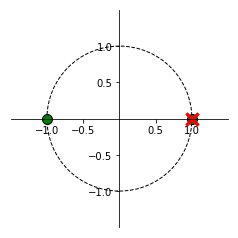

Nullstellen: [ 1. -1.]
Polstellen: [1. 1.]


In [24]:
%matplotlib inline
b = np.array([1, 0, -1])
a = np.array([1, -2, 1])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

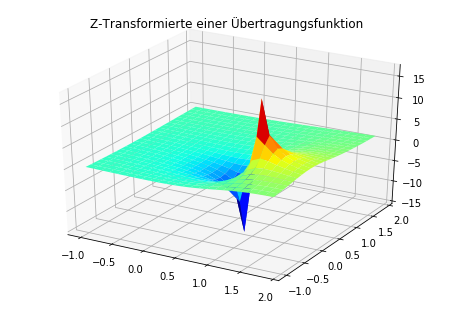

In [25]:
%matplotlib inline
#%matplotlib notebook
p1 = complex(1.0,0.0)
p2 = complex(1.0,0.0)
z1 = complex(1.0, 0.0)
z2 = complex(-1.0, 0.0)
plot_z_3d(p1, p2, z1, z2)

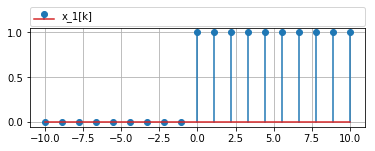

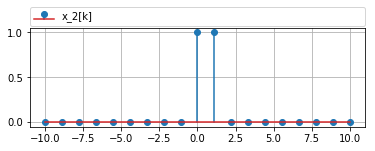

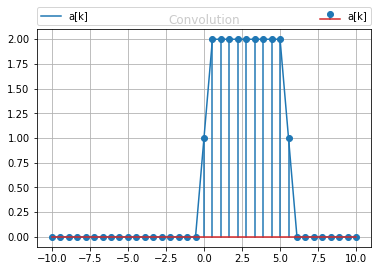

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
k = np.linspace(-10,10,19)
x_1 = np.heaviside(k,1)
x_2 = np.heaviside(k,1) - np.heaviside(k-2,1)
a_k = np.convolve(x_1, x_2)
k_2 = np.linspace(-10,10,len(a_k))

plt.subplot(211)
plt.stem(k,x_1, label = "x_1[k]")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.grid(True)
plt.show()

plt.subplot(212)
plt.stem(k,x_2, label = "x_2[k]")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.grid(True)
plt.show()

plt.title("Convolution")
plt.plot(k_2,a_k, label = "a[k]")
plt.stem(k_2,a_k, label = "a[k]")
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.show()


## weitere Regeln
- Dämpfungssatz: $$a^{-k} \cdot x[k] \circ \!\!-\!\!\bullet X(a \cdot z)$$ Der Konvergenzradius $r$ ändert sich um Faktor $|a|$, womit sich der Konvergenzbereich $\mathcal{K}$ vergrößert.

- Ableitung der Bildfunktion: $$k \cdot x[k] \circ \!\!-\!\!\bullet -z \frac{dF(z)}{dz}$$ Der Konvergenzbereich $\mathcal{K}$ bleibt unverändert.

- Zeitinversion (nur in der Zweiseitigen Z-Transformation): $$x[-k] \circ \!\!-\!\!\bullet X(\frac{1}{z})$$ Der Konvergenzbereich wird invertiert $\mathcal{K} = \frac{1}.{\mathcal{K_x}}$


- Konjugiert komplexe Zeitfolge: $$x^{*}[k] \circ \!\!-\!\!\bullet X^{*}(z^{*})$$ Der Konvergenzradius $\mathcal{K}$ bleibt unverändert.

- Multiplikationssatz: $$w_k \circ \!\!-\!\!\bullet \sum_{k=0}^K u_{K-k} \cdot v_k = \sum_{k=0}^K u_{k} \cdot v_{k-n}$$

- 1.Grenzwertsatz: $$x[k] = \lim_{z\to\infty} z^k \cdot (X(z) - \sum_{k=0}^{K-1} z^{-k} \cdot x[k]) \textrm{ und } x[k] = \lim_{z\to\infty} X(z)$$

- 2.Grenzwertsatz: $$\lim_{k\to\infty} x[k] = \lim_{z\to 1} (z-1)\cdot X(z)$$

- Upsampling (Einfügen von nullen): $$x[\frac{k}{N}], \frac{k}{N} \in\mathrm{Z} \circ \!\!-\!\!\bullet X(Z^N)$$
Der neue Konvergenzbereich ist Teilmenge der n-ten Wurzel des alten Konvergenzbereiches, $\mathcal{K} \supseteq \sqrt[N]{\mathcal{K}_x}$.

- Stabilität: Für alle Polstellen gilt $|z| < 1$ -> asymptotische Stabilität

### Beispiel
- Gegeben sei die Übertragungsfunktion aus dem ersten Beispiel $H(z) = \frac{z^2 + 2z + 1}{z^2}$

- Da das System ein FIR-System ist liegt nahe, dass das System stabil ist.

- Ist das System $H(z)$ wirklich stabil? 

- Ob das system Stabil ist kann einfach über die Pol-/ und Nullstellen bestimmt werden

- Für die Nullstellen gilt: $z^2 + 2z + 1 = 0$
    * $z_{0,1} = z_{0,2} = -1$

- Für die Polstellen gilt $z^2 = 0$
    * $z_{\infty,1} = z_{\infty,2} = 0$
    
- Da für alle Polstellen $|z_{\infty,i}| < 1$ erfüllt ist, ist $H(z)$ stabil.

- Der Pol-/ Nullstellenplan

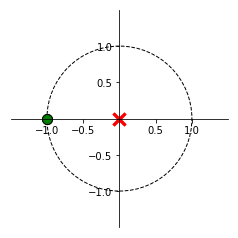

Nullstellen: [-1. -1.]
Polstellen: [0. 0.]


In [27]:
%matplotlib inline
b = np.array([1, 2, 1])
a = np.array([1, 0, 0])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

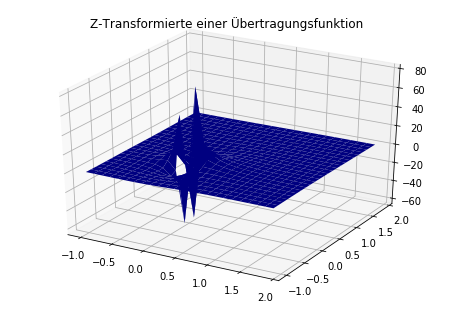

In [28]:
%matplotlib inline
#%matplotlib notebook
p1 = complex(0.0,0.0)
p2 = complex(0.0,0.0)
z1 = complex(-1.0, 0.0)
z2 = complex(-1.0, 0.0)
plot_z_3d(p1, p2, z1, z2)

## Korespondenztabelle für die Z-Transformation
  Nr  | Signal $x[k]$                        | Z-Transformierte $X(z)$                                                         
------|--------------------------------------|--------------------------------------------------------------------------------
  1   | $\delta[k]$                          | $1$                                                                             
  2   | $\sigma[k]$                          | $\frac{z}{z-1}$                                                                 
  3   | $k \cdot \sigma[k]$                  | $\frac{z}{(z-1)^2}$                                                            
  4   | $k^2 \cdot \sigma[k]$                | $\frac{z\cdot(z+1)}{(z-1)^{-3}}$                                               
  5   | $\lambda^k \cdot \sigma[k]$          | $\frac{z}{z-\lambda}$                                                           
  6   | $k\cdot\lambda^k\cdot\sigma[k]$      | $\frac{z\cdot\lambda}{(z-\lambda)^2}$                                           
  7   | $k^2\cdot\lambda^k\cdot\sigma[k]$    | $\frac{z\cdot\lambda\cdot(z+\lambda)}{(z-\lambda)^3}$                           
  8   | $k^3\cdot\lambda^k\cdot\sigma[k]$    | $\frac{z\cdot\lambda\cdot(z^2+4\cdot\lambda\cdot z+ \lambda^2)}{(z-\lambda)^4}$ 
  9   | $\sin (k\cdot\Omega_0)\cdot\sigma[k]$|$\frac{z\cdot\sin(\Omega_0)}{z^2-2\cdot z\cdot\cos(\Omega_0)+1}$                 
  10  | $\cos (k\cdot\Omega_0)\cdot\sigma[k]$|$\frac{z\cdot\cos(\Omega_0)}{z^2-2\cdot z\cdot\cos(\Omega_0)+1}$                 

* Der Konvergenzbereich genügt der bedingung $|z| \geq 1$ bzw. $|z| \geq \lambda$ mit $z, \lambda\in \mathcal{C}$ 

# Rücktransformation / inverse Z-Transformation
- Die inverse Z-Transformation ist gegebeben mit $x[k] = \mathcal{Z}^{-1} \cdot X(z)$

- Die Integraldarstellung hat die Form 
$$x[k] = \big( \frac{1}{2\pi j} \big) \cdot \oint X(z) \cdot z^{k-1}\,dz$$

- Meistens entsehen bei der Z-Transformation gebrochen Rationale Funktionen wie im 1. Beispiel

- Deren Rücktransformation kann am einfachsten über die Partialbruchzerlegung durchgeführt werden. Diese Methode zerlegt eine komplizierte algebraische Funktion in elementare Terme. Diese elementaren Terme können dann einfach transformiert werden. Eine weitere Möglichkeit is es diese durch den Residuensatz durchzuführen.Eine ditte Möglichkeit der Rücktransformation ist das komplexe Umkehrintegral.


- Die Rücktransformation wird nur für den praktisch relvanten Fall der kausalen Signale betrachtet.

## inverse Z-Transformation über Partialbruchzerlegung

- gegeben sind zwei Ganz Rationale Funktinen $A(z)$ und $B(z)$.

- Gesucht ist X(z)$ \bullet \!\!-\!\!\circ x[k]$
$$X(z) = \frac{B(z)}{A(z)} = \frac {\sum_{i=0}^M b_i \cdot z^{i}} {\sum_{i=0}^N a_i \cdot z^{i}} = \frac{b_0 + b_1 \cdot z^1 + ... + b_M \cdot z^N}{a_0 + a_1 \cdot z^1 + ... + a_N \cdot z^N}$$

- Für die Partialbruchzerlegung muss der Grad des Nennerpolynoms größer als der Grad des Zählerpolynoms sein.

- Da es Sich bei $A(z)$ und $B(z)$ jeweils um Kausale Signale handelt ist der Grad von $A(z)$ maximal so groß wie der Grad $B(z)$. 

- Tritt der Fall ein, das $M = N$ muss vor der Partialbruchzerlegung eine Polynomdivision durchgeführt werden.

- Als Ergebnis dieser Polynomdivision ist ein konstanter Summand $X_0 = \frac{b_M}{a_N}$. 

- Ist $X(z)$ dann eine echt gebrochen Rationale Funktion werden die Pole bestimmt. Diese entsprechen den Nullstellen der Funtion $A(z)$.

- Je nach Vielfachheit der Polstelle werden dann verschiedene Ansätze für den Koeffizientenvergleich gewählt  

### einfacher Pol an $z \neq 0$

$$ X(z) = \frac{B(z)}{A(z)} = \frac{A}{z-\alpha_1} + \frac{B}{z-\alpha_2} + ... + \frac{Q}{z-\alpha_n}$$

* Multiplikation mit $A(z)$ um die Gleichung auf den Haupnenner $A(z)$ zu bringen.
        
  $$ B(z) = \frac{A\cdot A(z)}{z-\alpha_1} + \frac{B\cdot A(z)}{z-\alpha_2} + ... + \frac{Q\cdot A(z)}{z-\alpha_n}$$

* Durch den Koeffizientenvergleich entsteht ein lineares Gleichungssystem
$$
    1   : \textrm{ Summe aller von z unabhängigen Koeffizienten } = \textrm{ Koeffizient vor 1}
$$
$$
    z^1 : \textrm{ Summe aller von z^1 abhängige Koeffizienten }  = \textrm{ Koeffizient vor } z^1
$$
$$
    ...
$$
$$
    z^n : \textrm{ Summe aller von z^n abhängige Koeffizienten }  = \textrm{ Koeffizient vor } z^n
$$

* Aus diesen Gleichungen kann ein LGS Aufgestellt werden um alle $C_i$ zu berrechnen.

* Anschließend hat jeder der partialbrüche die  Form $X_i(z) = \frac{C_i}{z-\alpha_i}$ mit $C_i = \{A, B, ..., Q\}$

* Diese Partialbrücke können über die Korrespondenztabelle in eine um 1 nach rechts verschobene kausale Exponentialfolge überführt werden.
        
  $$X_i[k] = \mathcal{Z}\big\{\frac{C_i}{z-\alpha_i}\big\} = C_i \cdot \alpha_i^{k-1} \cdot \sigma[k-1]$$

* Summiert man alle $X_n[k]$ auf ergibt sich die Folge im Zeitbereich 
  $$x[k] = \sum_{i=1}^N C_i \cdot \alpha_i^{k-1} \cdot \sigma[k-1]$$ 

### mehrfacher Pol an $z \neq 0$

$$ X(z) = \frac{B(z)}{A(z)} = \frac{A}{z-\alpha_1} + \frac{B}{z-\alpha_1} + ... + \frac{Q}{z-\alpha_1}$$

* Multiplikation mit $A(z)$ um die Gleichung auf den Haupnenner $A(z)$ zu bringen.
        
  $$ B(z) = \frac{A\cdot A(z)}{z-\alpha_1} + \frac{B\cdot A(z)}{z-\alpha_2} + ... + \frac{Q\cdot A(z)}{z-\alpha_n}$$

* Durch den Koeffizientenvergleich entsteht ein lineares Gleichungssystem
$$
    1   : \textrm{ Summe aller von z unabhängigen Koeffizienten } = \textrm{ Koeffizient vor 1}
$$
$$
    z^1 : \textrm{ Summe aller von z^1 abhängige Koeffizienten }  = \textrm{ Koeffizient vor } z^1
$$
$$
    ...
$$
$$
    z^n : \textrm{ Summe aller von z^n abhängige Koeffizienten }  = \textrm{ Koeffizient vor } z^n
$$

* Anschließend hat jeder der partialbrüche die  Form $X_i(z) = \frac{C_i}{z-\alpha_1}$ mit $C_i = \{A, B, ..., Q\}$

* Aus diesen Gleichungen kann ein LGS Aufgestellt werden um alle $C_i$ zu berrechnen.

* Diese Partialbrücke können über die Korrespondenztabelle überführt werden.
        
  $$X_i[k] = \mathcal{Z}\big\{\frac{C_i}{z-\alpha}\big\} = C_i \cdot \binom{k-1}{i-1} \cdot \alpha^{k-i} \cdot \sigma[k-i]$$

* Summiert man alle $X_i[k]$ auf ergibt sich für die Folge im Zeitbereich

$$x[k] = \sum_{i=1}^P C_i \cdot \binom{k-1}{i-1} \cdot \alpha^{k-i} \cdot \sigma[k-i]$$ 

* Dabei ist $P$ die Vielfachheit der Nullstellen

### Sonderfall mehrfacher Pol an $z = 0$

* Falls ein mehrfacher Pol an der stelle $z = 0$ auftritt muss Ein anderer Ansatz für die Partialbruchzerlegung und die Rücktransformation verwendet werden.

### Beispiel
* Gegeben ist die Gleichung $X(z) = \frac{z}{z^2 + 3 \cdot z + 2} = \frac{z}{(z+1) \cdot (z+2)}$

* Die zugehörigen Polstellen sind $\alpha_0 = -1 ;\alpha_1 = -2 $

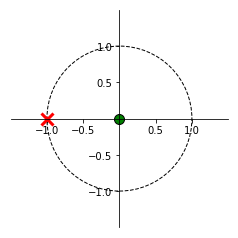

Nullstellen: [0.]
Polstellen: [-2. -1.]


In [29]:
%matplotlib inline
b = np.array([0, 1, 0])
a = np.array([1, 3, 2])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

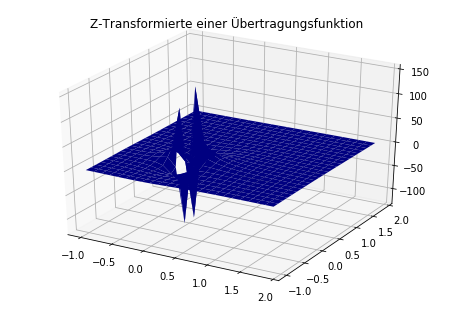

In [30]:
%matplotlib inline
#%matplotlib notebook
p1 = complex(0.0,0.0)
p2 = complex(0.0,0.0)
z1 = complex(-2.0, 0.0)
z2 = complex(-1.0, 0.0)
plot_z_3d(p1, p2, z1, z2)

* Für den Koeffizientenvergleich ergibts sich wegen der einfachen Nullstellen mit $z \neq 0$
 $$X(z) = \frac{z}{(z+1) \cdot (z+2)} = \frac{A}{z+1} + \frac{B}{z+2}$$

* Durch multiplikation mit $(z+1) \cdot (z+2)$ folgt
 $$ z = A \cdot (z+2) + B \cdot (z+1)$$

* Mit dem Koeffizientenvergleich und dem Einsetzen der Nullstellen ergibt sich für die Konstanten $A = -1$ und $B = 2$.

* Damit ergeben sich die Partialbrüche
 $$ X_1(z) = \frac{-1}{z+1} \textrm{  und  } X_2(z) = \frac{2}{z+2}$$
 $$ X(z) = \frac{-1}{z+1} + \frac{2}{z+2}$$

* Transformiert man dann die Pratialbrüche über die Korrespondenztabelle ergibt sich
$$x[k] = -1 \cdot (-1)^{k-1} \cdot \sigma[k-1] + 2 \cdot (-2)^{k-1} \cdot \sigma[k-1]$$

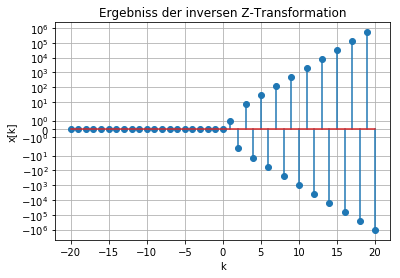

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

amount = 40
k = np.linspace(-amount//2, amount//2, amount+1)
k = np.int_(k)
sigma = np.heaviside(k-1, 1)
x = []
for n in k:
    tmp = (-1) * math.pow(-1,n-1) * np.heaviside(n-1, 1) + 2 * math.pow(-2,n-1)*np.heaviside(n-1, 1)
    x.append(tmp)
plt.stem(k,x)
plt.grid(True)
plt.title('Ergebniss der inversen Z-Transformation')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.yscale('symlog')
plt.show()

- an dem Plot kann man sehen, das das System nicht Stabil zu sein, da die Folge divergiert.

- Da einer der Polstellen $(-2 + 0j)  -->  |z| \gt 1  -->$ das System ist wirklich nicht stabil. 

## Lösung einer Differenzengleichung
- Gegeben ist eine Differenzengleichung der Form $\sum_{i=0}^V a_i \cdot y[k-i] = \sum_{i=0}^U b_i \cdot x[k-i]$

### ohne Anfangsbedingungen
- Diese Gleichung kann mit der Rechtsverschiebung (2.2) in eine Z-Transformierte Gleichung überführt werden.
$$\sum_{i=0}^V a_i \cdot Y(z) \cdot z^{-i} = \sum_{i=0}^U b_i \cdot X(z) \cdot z^{-i}$$

- Die Z-Transformierten $X(z)$ und $Y(z)$ können aus den Summen Ausgeklamert werden.
$$Y(z) \cdot \sum_{i=0}^V a_i \cdot z^{-i} = X(z) \cdot \sum_{i=0}^U b_i \cdot z^{-i}$$

- Anschließend kann die Gleichung nach der Z-Transformierten des Ausgangssignals aufgelöst werden.
$$Y(z) = X(z) \cdot \frac{\sum_{i=0}^U b_i \cdot z^{-i}}{\sum_{i=0}^V a_i \cdot z^{-i}}$$

- Die Ausgangsgleichung kann dann entweder über die inverse Z-Transformation mittels Residuensatz oder Partialbruchzerlegung in den Zeitbereich zurücktransformiert werden.

### mit Anfangsbedingungen
- Existieren Anfangsbedingungen muss das System von diesen Anfangswerten aus betrachtet werden. Mit der gegebenen Zeitinvarianz des Systems kann dies durch eine einfache verschiebung nach links durchgeführt werden.

$$\sum_{i = 0}^V a_{V-i} \cdot y[k-i+V] = \sum_{i = 0}^U b_{U-i} \cdot x[k-i+U]$$

- In impliziter daarstellung folgt

$$ y[k] = \frac{1}{a_V} - \sum_{i = 1}^V a_{V-i} \cdot y[k-i+V] + \sum_{i = 0}^U b_{U-i} \cdot x[k-i+U] $$

- Anschließend kann die Gleichung mit der Linksverschiebung (2.3) in eine Z-Transformierte Gleichung überführt werden.
$$\sum_{i=0}^V a_i \cdot \big(Y(z) \cdot z^{V-i} - z^{V-i} \cdot \sum_{k = 0}^{V-i-1} y[k] \cdot z^{-k}\big) = \sum_{i=0}^U b_i \cdot \big(X(z) \cdot z^{U-i} - z^{U-i} \cdot \sum_{k = 0}^{U-i-1} x[k] \cdot z^{-k}\big)$$

- Die Homogene Lösung wird zuerst behandelt, diese hat die Form
$$
    \sum_{i = 0}^V a_{V-i} \cdot y[k-i+V] = 0
$$

### Beispiel
- Anhand des Autonomen Systems der fibonacci Folge aus der Vorlesung mit den Anfangsbedingungen $y[0] = y[1] = 1$ 
$$y[k] = y[k-1] + y[k-2] $$

$$ y[k] - y[k-1] - y[k-2] = 0$$

- Verschiebung um $2$ nach links
$$ y[k+2] - y[k+1] - y[k] = 0$$

- Transformation in den Z-Bereich über die Linksverschiebung. Alle $a_i = 0$, $V = 2$.

$$Y(z) \cdot z^2 - z^2 \cdot \big(\sum_{k=0}^{1} y[k] \cdot z^{-k}\big)- (Y(z) \cdot z - z \cdot \big(\sum_{k=0}^{0} y[k] \cdot z^{-k}\big)- Y(z)= 0$$

$$ z^2 Y(z) - z^2 y[0] - z^1 y[1] - (zY(z) - zy[0]) - Y(z) = 0 $$

$$
    z^2 Y(z) - z^2 - z - zY(z) + z - Y(z) = 0
$$

$$
    Y(z) \cdot (z^2 - z - 1) -z^2 = 0
$$'

- Bringt man $Y(z)$ auf die linke Seite ergibt sich
$$
    Y(z) = \frac{z^2}{z^2 - z - 1}
$$

In [ ]:
%matplotlib inline
b = np.array([1, 0, 0])
a = np.array([1, -1, -1])
z,p,a = zplane(b,a)
print(f"Nullstellen: {z}")
print(f"Polstellen: {p}")

In [ ]:
%matplotlib inline
#%matplotlib notebook
p1 = complex(0.0,0.0)
p2 = complex(0.0,0.0)
z1 = complex(1.61803399, 0.0)
z2 = complex(-0.61803399, 0.0)
plot_z_3d(p1, p2, z1, z2)

- Diese Gleichung kann mittels Partialbruchzerlegung in den Zeitbereich zurücktransformiert werden. Dafür muss zuerst eine Polynomdivision durchgeführt  werden um eine echt gebrochen Rationale Funktion zu erhalten.
$$
\frac {z^2}{z^2 - z - 1} =  1 + \frac{z+1}{z^2 - z - 1}  
$$

- Damit ist die Konstante $Y_0$ = 1 bzw $y[0] = \delta[1]$ und die echt gebrochen rationale Funktion $\frac{z + 1}{z^2 - z - 1}$ 
- Die Pole der Funktion sind $z_{-\infty,0} = \frac{1+\sqrt{5}}{2}$ und $z_{-\infty,1} = \frac{1-\sqrt{5}}{2}$

- Führt man eine Partialbruchzerlegung durch und transformiert man diese mit der Korrespondenztabelle in den Zeitbereich zurück erhält man

$$ y[k] = \frac{1}{\sqrt{5}} \cdot  \bigg( \big( \frac{1+\sqrt{5}}{2} \big)^k - \big( \frac{1-\sqrt{5}}{2} \big)^k \bigg) $$

- Damit ergibt sich dann aus der Formel der folgende Plot

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

amount = 40
k = []
for i in range(amount):
    k.append(i)
y = []
for val in k:
    first = math.pow((1+math.sqrt(5))/2, val)
    second = math.pow((1-math.sqrt(5))/2, val)
    tmp = ((1/math.sqrt(5))*(first - second))
    y.append(tmp)
plt.stem(k,y)
plt.title('Fibonacci Formel')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.yscale('symlog')
plt.show()

## Signalflussplan
Die Darstellung einer Differenzengleichung im Signalflussplan wurde schon in der Vorlesung vorgestellt.
Da die Z-Transformation sich auf die normalen Differenzengleichungen bezieht kann man diesen weiterverwenden.
Die Verzögerungsglieder können dabei statt mit $T$, mit $z^{-1}$ dargestellt werden.


# Übertragungsglieder

# Bezug zur Laplace-Transformation und Fourier-Transformation
- Da es sich bei der Fourier-Transformation lediglich um einen Spezialfall der Laplace-Transformation handelt, wird der zusammenhang mit der Laplace-Transformation beschrieben

- Die Laplace-Transformation ist eine Transformation für zeitkontinuierliche Signale. Sie transformiert das System aus dem Zeitbereich in den Frequenzbereich. Im Frequenzbereich kann das mathematische Problem dann einfacher gelößt werden. Anschließend kann durch die Rücktransformation, auch inverse Laplace-Transformation genannt, die Lösung dann zurück in den Zeitbereich transformiert werden. 

- Schon bei der Herleitung der Definitionsgleichung 1.5 der Z-Transformation wurde der Ansatz über die Laplace-Transformation gewählt. Dies liegt an dem Zusammenhang der beiden Transformationen. Die Z-Transformation ist das Äquivalent zur Laplace-Transformation für den Zeitdiskreten Fall.

- Mit der Substitution $t = e^{T_A \cdot s}$ aus der Herleitung der Definitionsgleichung wird die komplexe s-Ebene in die komplexe z-Ebene abgebildet
s-Ebene	z-Ebene

s-Ebene          |          z-Ebene
--------------------------|---------------------------
imaginäre-Achse           | Einheitskreis
linke komplexe Ebene      | Inneres des Einheitskreises
rechte komplexe Ebene     | Äuseres des Einheitskreises
Ursprung $s = 0$          | $z = 1$ 

# Zusammenfassung
- Die Z-Transformation ist eines der wichtigsten Hilfsmittel zur Lösung von linearen Differenzengleichungen mit konstanten Koeffizienten. Sie vereinfacht die Theorie der diskreten LTI-Systeme und das Lösen der gegebenen mathematischen Probleme. Aus komplexen Faltungen im Zeitbereich zum bestimmen von Übertragungsgleichungen oder Systemantworten wird eine einfache Multiplikation im Z-Bereich. Sofern eine Z-Transformierte für ein diskretes LTI-System existiert ist es mit der einfachste Weg das System mit der Z-Transformation zu entschlüsseln.